In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize']= (10.0,8.0)

In [2]:
def construct_A(X):
    A=[]
    for i in range(X.shape[1]):
        row = []
        for j in range(X.shape[1]):
            s = 0
            for d in X:
                s +=d[i]*d[j]
            row.append(s)
        A.append(row)
    return np.matrix(A)

In [3]:
def construct_b(X,r):
    b=[np.dot(X[:,i],r) for i in range(X.shape[1])]
    return np.matrix(b)

In [51]:
def f(x):
    return 1 + 2*x

In [5]:
rg = np.random.RandomState(0)
rg.permutation(range(10))

array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5])

In [83]:
x_all = np.linspace(-2,2,100)
#x_all = np.linspace(0,8,100)
x_tr = x_all[25:75]
#print(x_tr)
x_tr = x_tr[rg.permutation(range(len(x_tr)))[:10]]
print(x_tr)
r_tr = f(x_tr)
r_all = f(x_all)

D_tr = x_tr[:,np.newaxis]
#print(D_tr)
X_tr = np.hstack((np.ones((D_tr.shape[0],1)),D_tr))

D_all = x_all[:,np.newaxis]

X_all = np.hstack((np.ones((D_all.shape[0],1)),D_all))
#print(x_all)
#print(X_all)

[ 0.86868687  0.94949495  0.42424242  0.62626263 -0.3030303  -0.70707071
  0.66666667  0.38383838  0.70707071 -0.46464646]


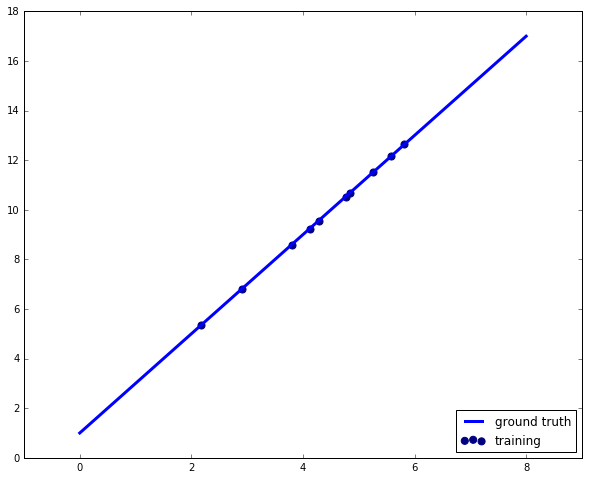

In [7]:
lw =3
plt.plot(x_all,f(x_all),color='blue',linewidth =lw,label="ground truth")
plt.scatter(x_tr,r_tr,color='navy',s=50,marker ='o',label= "training")
plt.legend(loc='lower right')

In [77]:
A= construct_A(X_tr)
print(X_tr,A)
b= construct_b(X_tr,r_tr)
print(b)

[[  1.00000000e+00   7.87878788e-01   6.20752984e-01   4.89078109e-01]
 [  1.00000000e+00  -2.62626263e-01   6.89725538e-02  -1.81140040e-02]
 [  1.00000000e+00  -8.68686869e-01   7.54616876e-01  -6.55525771e-01]
 [  1.00000000e+00  -2.02020202e-02   4.08121620e-04  -8.24488122e-06]
 [  1.00000000e+00  -1.41414141e-01   1.99979594e-02  -2.82799426e-03]
 [  1.00000000e+00  -9.49494949e-01   9.01540659e-01  -8.56008303e-01]
 [  1.00000000e+00   5.45454545e-01   2.97520661e-01   1.62283997e-01]
 [  1.00000000e+00   1.41414141e-01   1.99979594e-02   2.82799426e-03]
 [  1.00000000e+00   2.02020202e-02   4.08121620e-04   8.24488122e-06]
 [  1.00000000e+00   9.89898990e-01   9.79900010e-01   9.70002030e-01]] [[ 10.           0.24242424   3.66411591   0.09171606]
 [  0.24242424   3.66411591   0.09171606   2.82183641]
 [  3.66411591   0.09171606   2.82183641   0.03473807]
 [  0.09171606   2.82183641   0.03473807   2.36924579]]
[[ -35.15040209  133.62941635  -30.52552078  103.53849986]]


In [78]:
A.I*b.T

matrix([[  7.15111156e-17],
        [  3.60000000e+01],
        [ -1.20000000e+01],
        [  1.00000000e+00]])

[  2.31817729 -27.29346227  14.27937446 -35.57933243  -0.635748
 -32.01786496  23.02392468 -38.80109999  25.51954275  17.6755088 ] [  2.13796366 -27.49753633  15.2497323  -36.30175029  -0.73217843
 -31.80743255  22.15379795 -38.6190566   24.84756554  18.08461928] [ 0.08270994 -1.29105846 -0.66110423 -1.18019102  0.19764264  0.41389998
  1.19732198  1.88335386  0.71422382  2.28433335]


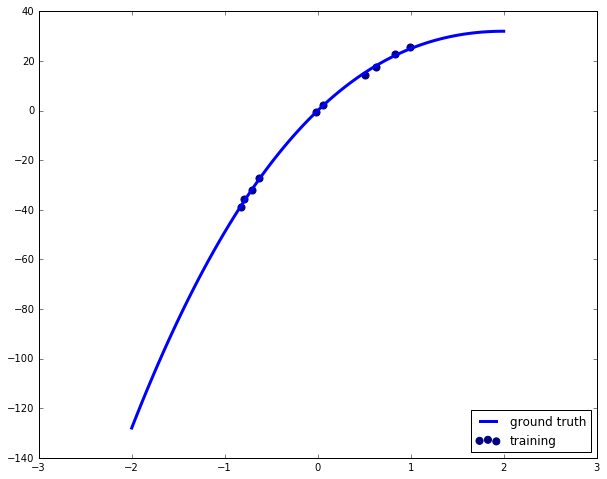

In [40]:
r_noisy = r_tr+rg.normal(loc=0,scale=0.5,size=len(r_tr))
print(r_noisy,r_tr,rg.normal(loc=0,scale=1,size=len(r_tr)))
lw =3
plt.plot(x_all,f(x_all),color='blue',linewidth =lw,label="ground truth")
plt.scatter(x_tr,r_noisy,color='navy',s=50,marker ='o',label= "training")
plt.legend(loc='lower right')

In [11]:
from sklearn import datasets, linear_model
clf = linear_model.LinearRegression(fit_intercept=False)
clf.fit(X_tr,r_noisy)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [12]:
clf.coef_

array([ 1.42991812,  1.87950219])

In [13]:
np.linalg.lstsq(X_tr,r_tr)

(array([ 1.,  2.]),
 array([  3.98282786e-29]),
 2,
 array([ 14.53178628,   0.75489522]))

In [82]:

def f(x):
    return 1+(x**3)-12*(x**2)+36*x

In [84]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
X_tr=pf.fit_transform(D_tr)
A=construct_A(X_tr)
b=construct_b(X_tr,r_tr)
w=np.squeeze(np.asarray(A.I*b.T))
X_all=pf.transform(D_all)
p = np.dot(X_all,w)


In [85]:
w

array([  1.,  36., -12.,   1.])

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()

In [18]:
boston
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(boston.data, boston.target) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
pr= [[6.71311099,
  11.3774704,
  12.7703953,
  0.0592885375,
  0.588693281,
  6.23768379,
  71.4363636,
  3.43944269,
  14.5335968,
  18.9952569,
  336.734941,
  13.9339921]]

In [20]:
pr = [[  6.71311099e+00,   1.13774704e+01,   1.27703953e+01,           5.92885375e-02,   5.88693281e-01,   6.23768379e+00,           7.14363636e+01,   3.43944269e+00,   1.45335968e+01,           4.95553360e+02,   1.89952569e+01,   3.36734941e+02,           1.39339921e+01]]

In [21]:
clf.predict(pr)

array([ 21.06101508])

In [22]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
X = boston.data
y = boston.target
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y,cv=5,scoring='neg_mean_squared_error'))

[-15.1506561  -33.33108327 -53.28544689 -56.60390369 -19.29364303]


In [23]:
sam=np.array(cross_val_score(lasso, X, y,cv=5,scoring='neg_mean_squared_error'))

In [24]:
sam

array([-15.1506561 , -33.33108327, -53.28544689, -56.60390369, -19.29364303])

In [25]:
sam.mean()*-1

35.532946595983333

In [26]:
x1 = np.array([2, 0, 4, 3, 1])
x2 = np.array([3, 2, 0, 4, 1])
x3 = np.array([2, 4, 3, 0, 1])
y = np.array([11, 7, 11.25, 13, 5.25])

In [27]:
 A = np.vstack([ np.ones(len(x1)),x1,x2,x3]).T
print(A)

[[ 1.  2.  3.  2.]
 [ 1.  0.  2.  4.]
 [ 1.  4.  0.  3.]
 [ 1.  3.  4.  0.]
 [ 1.  1.  1.  1.]]


In [28]:
np.linalg.lstsq(A, y)[0]

array([ 1.  ,  2.  ,  1.5 ,  0.75])

In [29]:
x=np.linalg.lstsq(A, y)[0]
x

array([ 1.  ,  2.  ,  1.5 ,  0.75])

In [30]:
format(1, '0.2f')

'1.00'

In [99]:
x1 = np.array([2, 4])
y = np.array([5,7])
A = np.vstack([ np.ones(len(x1)),x1]).T
A

array([[ 1.,  2.],
       [ 1.,  4.]])

In [100]:
np.linalg.lstsq(A, y)[0]

array([ 3.,  1.])